In [1]:
from packages.path_storage import PathStorage
from packages.loaders import DataLoader
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
import time

train_x = DataLoader.load_numpy_array(PathStorage.get_path_to_data() / 'sbert_and_perceptron' / "train_x_dense_for_perceptron.npy")
train_y = DataLoader.load_numpy_array(PathStorage.get_path_to_data() / 'sbert_and_perceptron' / "train_y_dense_for_perceptron.npy")

train_x.shape, train_y.shape

((2736,), (2736, 58))

In [2]:
import numpy as np

dense_tensor_train = np.concatenate(train_x, axis=0)

dense_tensor_train

array([[ 0.5596171 , -0.34238046, -0.71534413, ...,  0.1210029 ,
        -0.6295362 ,  0.05506237],
       [ 0.16345602, -0.8419221 , -0.53178793, ..., -0.31735623,
         0.44260076,  0.23565364],
       [ 0.18327032, -0.13555776, -0.10520981, ...,  0.32292515,
         0.15902899,  0.45175344],
       ...,
       [ 0.89621305, -0.03971191, -0.4992862 , ...,  0.56500477,
         0.18632881, -0.19127329],
       [ 0.0586265 , -0.17802893,  0.43989676, ...,  0.03772982,
        -0.10795243,  0.12907775],
       [ 0.41831192, -0.1285576 ,  0.19392048, ...,  0.12859444,
        -0.6129851 ,  0.25123376]], dtype=float32)

In [3]:
INPUT_SHAPE = dense_tensor_train.shape[1]
OUTPUT_SHAPE = train_y.shape[1]

INPUT_SHAPE, OUTPUT_SHAPE

(1024, 58)

In [4]:
start = time.time()

model_0 = Sequential()
model_0.add(Dense(128, input_shape=(INPUT_SHAPE,), activation='relu'))
model_0.add(Dropout(0.4))
model_0.add(Dense(64, activation='relu'))
model_0.add(Dropout(0.4))
model_0.add(Dense(OUTPUT_SHAPE, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_0.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history_training_0 = model_0.fit(dense_tensor_train, train_y, epochs=40, batch_size=5)

Epoch 1/40
548/548 [==============================] - 1s 843us/step - loss: 3.6672 - accuracy: 0.1192
Epoch 2/40
548/548 [==============================] - 1s 958us/step - loss: 3.3109 - accuracy: 0.1959
Epoch 3/40
548/548 [==============================] - 0s 817us/step - loss: 3.1189 - accuracy: 0.2211
Epoch 4/40
548/548 [==============================] - 0s 787us/step - loss: 3.0192 - accuracy: 0.2379
Epoch 5/40
548/548 [==============================] - 0s 794us/step - loss: 3.0539 - accuracy: 0.2372
Epoch 6/40
548/548 [==============================] - 0s 789us/step - loss: 3.0444 - accuracy: 0.2442
Epoch 7/40
548/548 [==============================] - 0s 786us/step - loss: 3.0327 - accuracy: 0.2566
Epoch 8/40
548/548 [==============================] - 0s 791us/step - loss: 3.0314 - accuracy: 0.2474
Epoch 9/40
548/548 [==============================] - 0s 808us/step - loss: 2.9261 - accuracy: 0.2507
Epoch 10/40
548/548 [==============================] - 0s 831us/step - loss: 2.932

In [5]:
from keras.callbacks import EarlyStopping
from keras import Input

start = time.time()

model = Sequential()

model.add(Input(shape=(INPUT_SHAPE,), sparse=True))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

early_stop = EarlyStopping(monitor='loss', min_delta=0.05, patience=10, restore_best_weights=True)
optimizer  = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer , metrics=['accuracy'])

history_training = model.fit(dense_tensor_train, train_y, epochs=100, batch_size=25, callbacks=[early_stop])

total_pred_time = time.time() - start
print(total_pred_time)

Epoch 1/100
110/110 [==============================] - 1s 2ms/step - loss: 3.1229 - accuracy: 0.2566
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 1.9943 - accuracy: 0.4726
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 1.5854 - accuracy: 0.5694
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 1.3633 - accuracy: 0.6111
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 1.2156 - accuracy: 0.6535
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 1.1135 - accuracy: 0.6820
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.9956 - accuracy: 0.7061
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.9396 - accuracy: 0.7156
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.9071 - accuracy: 0.7317
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.8356 - accura

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

def draw_plot(data, type_data):
    plt.figure(figsize=(25, 5))
    plt.plot(data, 'darkorange', label='Train')
    plt.xlabel('Epoch')
    plt.ylabel(type_data)
    plt.legend()

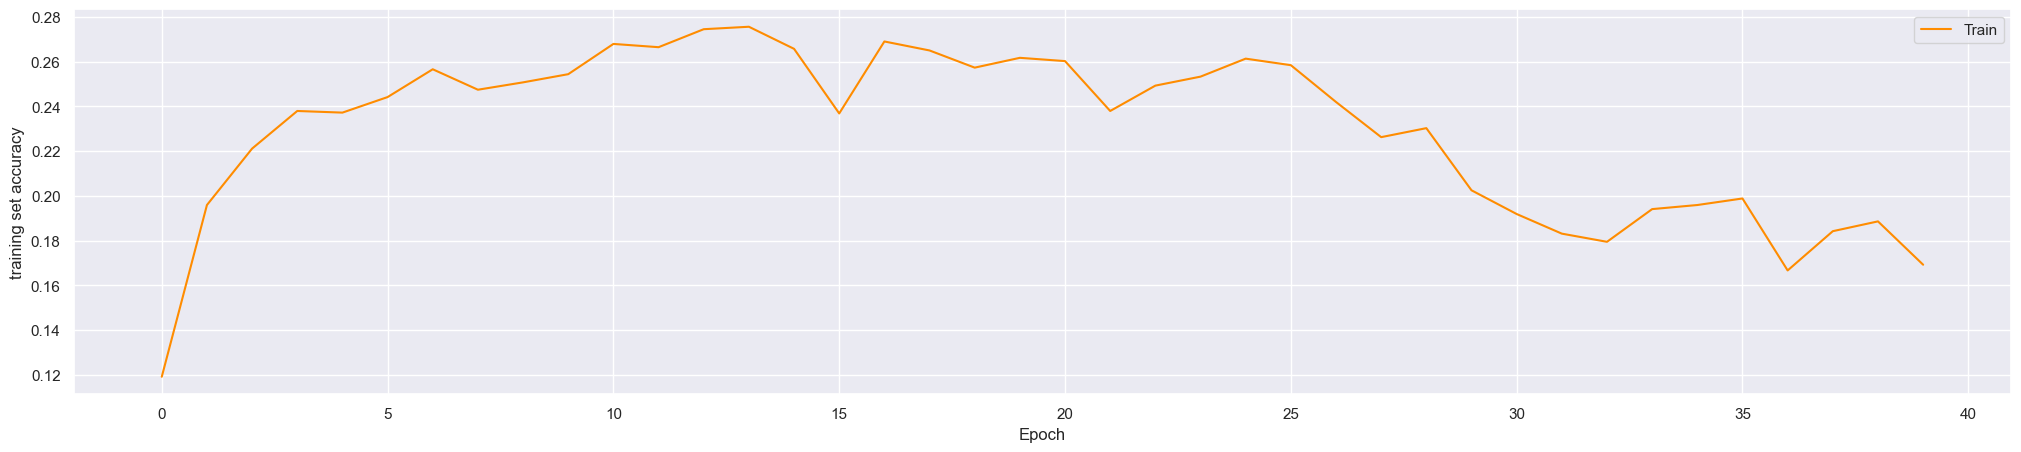

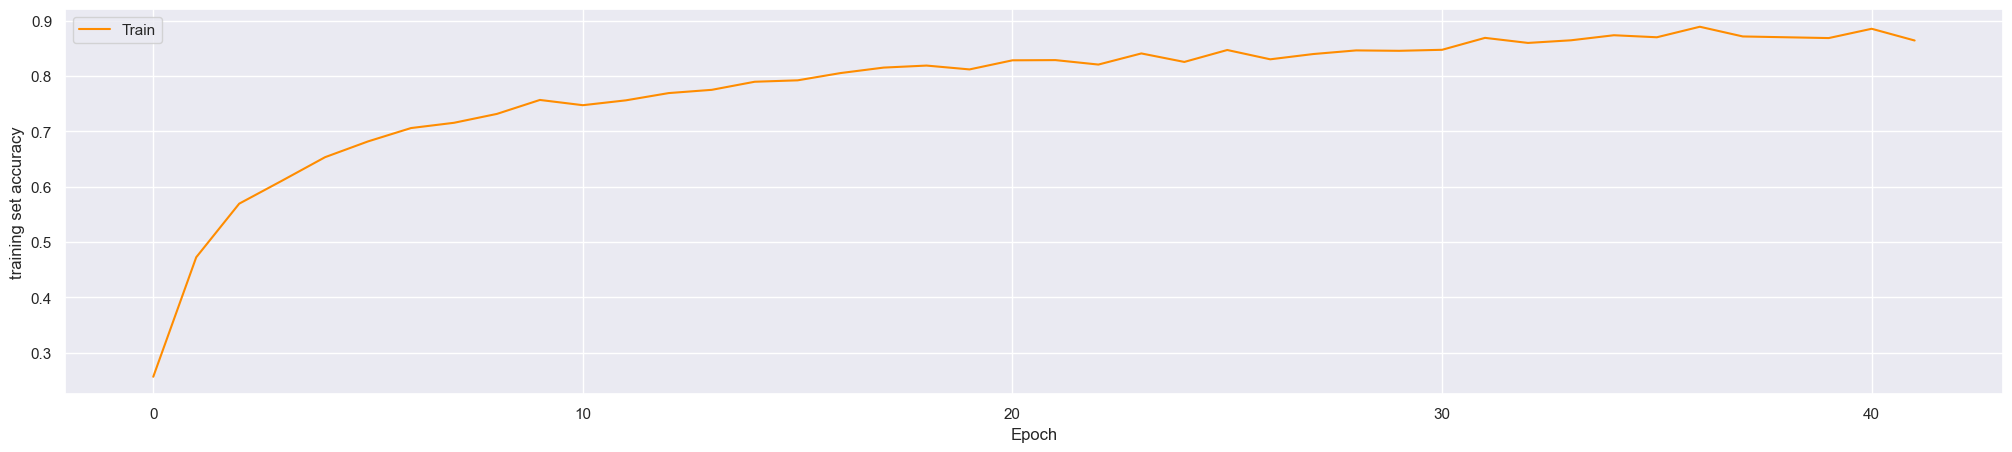

In [7]:
draw_plot(history_training_0.history['accuracy'], 'training set accuracy')
draw_plot(history_training.history['accuracy'], 'training set accuracy')

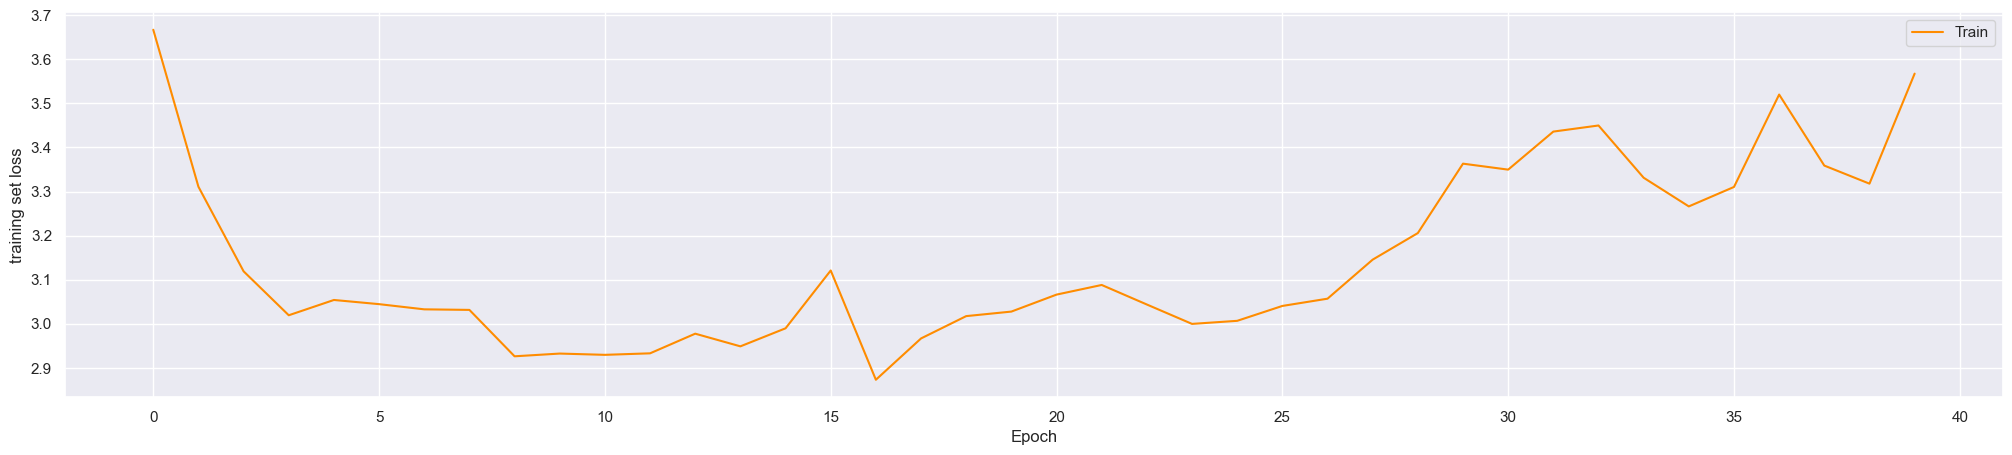

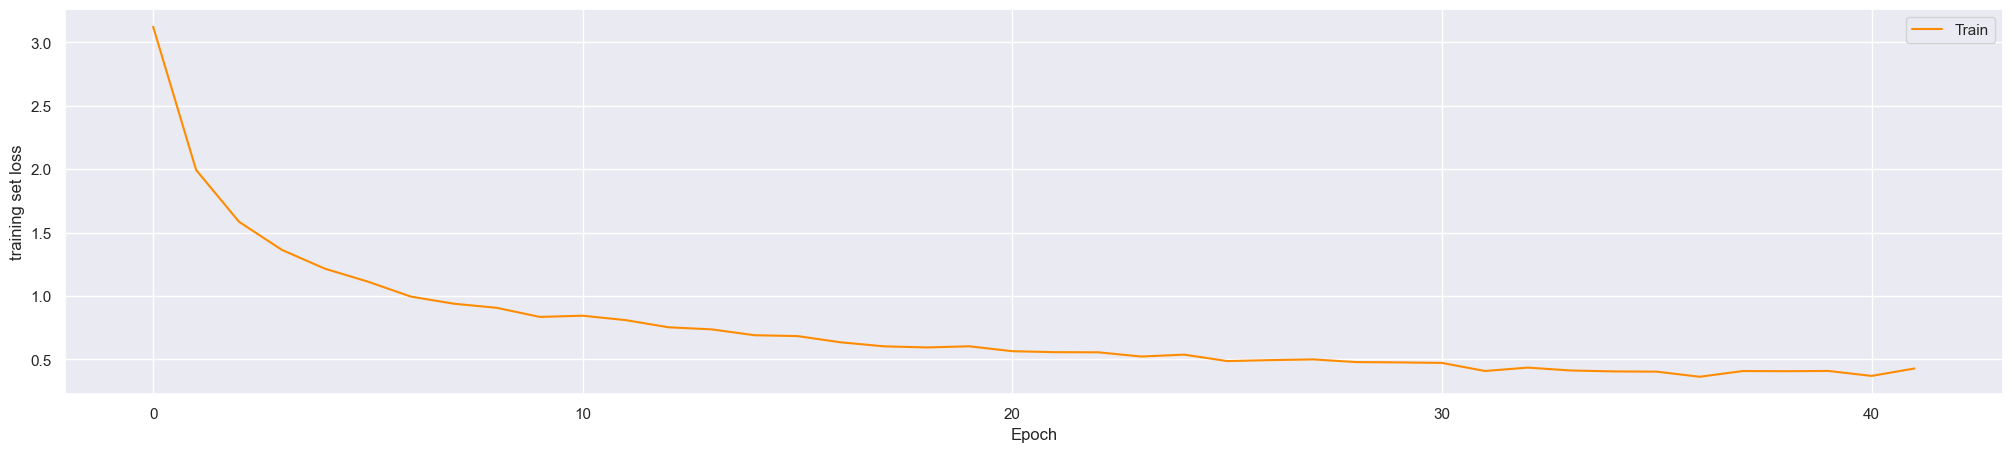

In [8]:
draw_plot(history_training_0.history['loss'], 'training set loss')
draw_plot(history_training.history['loss'], 'training set loss')

In [9]:
model.save(PathStorage.get_path_to_models() / "sbert_and_perceptron" / "perceptron.h5")

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

start = time.time()

# Создаем объект классификатора k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель на тренировочных данных
knn_model.fit(dense_tensor_train, train_y.argmax(axis=1))

# Предсказываем классы на тестовых данных
train_y_pred = knn_model.predict(dense_tensor_train)

# Вычисляем точность классификации
train_accuracy = accuracy_score(train_y.argmax(axis=1), train_y_pred)

total_pred_time = time.time() - start
total_pred_time, train_accuracy

(0.34800124168395996, 0.8278508771929824)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

start = time.time()

# Создаем объект классификатора k-NN
knn_model = KNeighborsClassifier(n_neighbors = 31, p = 1, weights = "distance")

# Обучаем модель на тренировочных данных
knn_model.fit(dense_tensor_train, train_y.argmax(axis=1))

# Предсказываем классы на тестовых данных
train_y_pred = knn_model.predict(dense_tensor_train)

# Вычисляем точность классификации
train_accuracy = accuracy_score(train_y.argmax(axis=1), train_y_pred)

total_pred_time = time.time() - start
total_pred_time, train_accuracy

(0.6651566028594971, 0.9908625730994152)